In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystan
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_excel('./data/real_estate2.xlsx')

In [4]:
df.head()

,id,station,distance,space,room,year,type,value
0,1,Y,徒歩10分以内,70,3LDK,1983,-,910
1,2,Y,徒歩10分以内,70,2LDK,1983,D,1120
2,3,Y,徒歩10分以内,70,2LDK,1983,A,1190
3,4,Y,徒歩10分以内,70,4LDK,1983,A,1190
4,5,Y,徒歩10分以内,70,4LDK,1983,A,1190


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        200 non-null    int64 
 1   station   200 non-null    object
 2   distance  200 non-null    object
 3   space     200 non-null    int64 
 4   room      200 non-null    object
 5   year      200 non-null    int64 
 6   type      200 non-null    object
 7   value     200 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 12.6+ KB


In [6]:
df.describe()

,id,space,year,value
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,73.700000,1991.620000,2340.050000
std,57.879185,14.469167,13.990866,1468.886871
min,1.000000,30.000000,1967.000000,330.000000
25%,50.750000,70.000000,1979.000000,1190.000000
50%,100.500000,70.000000,1994.500000,1890.000000
75%,150.250000,90.000000,2004.000000,3197.500000
max,200.000000,130.000000,2015.000000,7110.000000


In [7]:
df.corr()

,id,space,year,value
id,1.000000,0.195193,-0.010816,-0.174532
space,0.195193,1.000000,0.326704,0.355167
year,-0.010816,0.326704,1.000000,0.829576
value,-0.174532,0.355167,0.829576,1.000000


In [8]:
df['elapsed'] = 2018 - df['year']

In [10]:
df['distance'].unique()

array(['徒歩10分以内', '徒歩15分以内', '徒歩5分以内', '徒歩15分超', 'バス', '-'], dtype=object)

In [11]:
dis_arr = df['distance'].unique()

In [12]:
dis_arr

array(['徒歩10分以内', '徒歩15分以内', '徒歩5分以内', '徒歩15分超', 'バス', '-'], dtype=object)

In [13]:
dis_dict = {dis_arr[0]:10, dis_arr[1]:15, dis_arr[2]:5, dis_arr[3]:20, dis_arr[4]:30, dis_arr[5]:np.nan}

In [14]:
dis_dict

{'徒歩10分以内': 10, '徒歩15分以内': 15, '徒歩5分以内': 5, '徒歩15分超': 20, 'バス': 30, '-': nan}

In [15]:
df['distance2'] = df['distance'].apply(lambda x:dis_dict[x])

In [16]:
df.head()

,id,station,distance,space,room,year,type,value,elapsed,distance2
0,1,Y,徒歩10分以内,70,3LDK,1983,-,910,35,10.0
1,2,Y,徒歩10分以内,70,2LDK,1983,D,1120,35,10.0
2,3,Y,徒歩10分以内,70,2LDK,1983,A,1190,35,10.0
3,4,Y,徒歩10分以内,70,4LDK,1983,A,1190,35,10.0
4,5,Y,徒歩10分以内,70,4LDK,1983,A,1190,35,10.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         200 non-null    int64  
 1   station    200 non-null    object 
 2   distance   200 non-null    object 
 3   space      200 non-null    int64  
 4   room       200 non-null    object 
 5   year       200 non-null    int64  
 6   type       200 non-null    object 
 7   value      200 non-null    int64  
 8   elapsed    200 non-null    int64  
 9   distance2  197 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 15.8+ KB


In [18]:
df = df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         197 non-null    int64  
 1   station    197 non-null    object 
 2   distance   197 non-null    object 
 3   space      197 non-null    int64  
 4   room       197 non-null    object 
 5   year       197 non-null    int64  
 6   type       197 non-null    object 
 7   value      197 non-null    int64  
 8   elapsed    197 non-null    int64  
 9   distance2  197 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.9+ KB


In [20]:
df2 = df[['space', 'elapsed', 'distance2', 'value']]

In [21]:
df2.head()

,space,elapsed,distance2,value
0,70,35,10.0,910
1,70,35,10.0,1120
2,70,35,10.0,1190
3,70,35,10.0,1190
4,70,35,10.0,1190


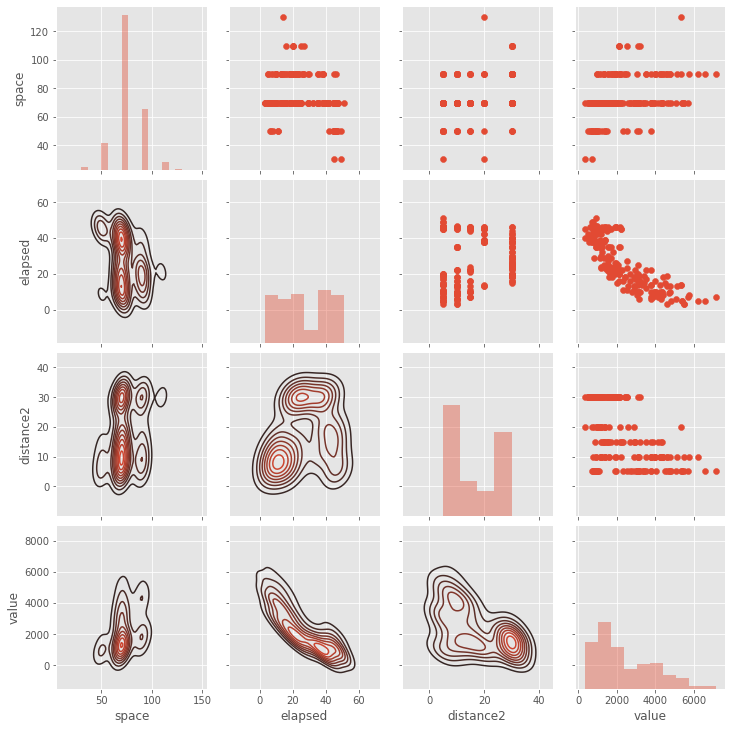

In [22]:
g = sns.PairGrid(df2)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.distplot, kde=False)
g = g.map_upper(plt.scatter)

In [23]:
df2.corr()

,space,elapsed,distance2,value
space,1.000000,-0.319304,0.237329,0.352599
elapsed,-0.319304,1.000000,0.279037,-0.828952
distance2,0.237329,0.279037,1.000000,-0.513352
value,0.352599,-0.828952,-0.513352,1.000000


In [26]:
stan_model = """
data {
  int N;
  real elapsed[N];
  real dis[N];
  real space[N];
  real Y[N];
}

parameters {
 real d;
 real s;
 real e;
 real b;
 real<lower=0> sigma;
}

model {
  real mu;
  for (n in 1:N) {
    mu = e * elapsed[n] + d * dis[n] + s * space[n] + b;
    Y[n] ~ normal(mu, sigma);
  }
}

"""


In [27]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bf42adc311cf18c3c54fb3040fdd4009 NOW.


In [28]:
stan_data = {'N':df2.shape[0], 'elapsed':df2.elapsed, 'dis':df2.distance2, 'space':df2.space, 'Y':df.value}

In [29]:
fit = sm.sampling(data=stan_data, iter=2000, warmup=500, chains=4, seed=123)

In [30]:
fit

Inference for Stan model: anon_model_bf42adc311cf18c3c54fb3040fdd4009.
4 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
d     -57.56    0.08   4.98 -67.42 -60.88 -57.49 -54.21 -47.86   3857    1.0
s      24.62    0.07   3.59  17.44  22.19  24.55  26.99  31.65   2774    1.0
e     -67.68    0.06   3.74 -75.06 -70.21 -67.72 -65.17 -60.36   3392    1.0
b     3299.3    5.71 294.14 2734.2 3100.8 3304.8 3497.2 3885.9   2653    1.0
sigma 636.87    0.44  31.74 577.41 615.03 635.19 657.69 701.32   5111    1.0
lp__   -1363    0.03   1.54  -1367  -1364  -1363  -1362  -1361   2142    1.0

Samples were drawn using NUTS at Sun May 24 12:08:15 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

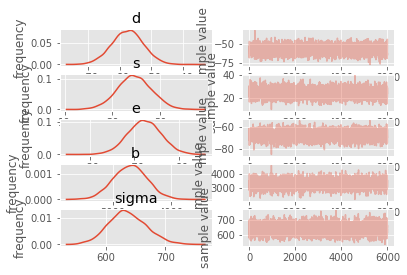

In [31]:
fig = fit.plot()